## *Exploring Data Analysis*

In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv('Fraud.csv')

In [ ]:
def visualization():
    print(df.head())
    print('*'*100)
    print(df.shape)
    print("Shape of data set")
    print('*'*100)
    print(df.info())
    print('*'*100)
    print(df.type.value_counts())
    print('*'*100)
    print(df.iloc[0])
    print('*'*100)

visualization()

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  
****************************************************************************************************
(835

**Understanding Data**

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


Only newbalanceDest,isFraud and isFlaggedFraud is null and that uu only one value so remove null values

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['step'].max()

10

The step feature maps the transactions to units of time in the simulation. In this dataset, 1 step represents 1 hour, and there are 323 steps in total, which is equivalent to 13 days.
 **This feature helps track when each transaction occurred. Analyzing this feature can help identify transaction patterns over time, such as peaks in activity, or when fraudulent transactions tend to happen.**

In [ ]:
df['type'].value_counts()

,count
type,
PAYMENT,33529
CASH_OUT,25155
CASH_IN,16818
TRANSFER,7192
DEBIT,866


This feature records the type of financial transaction being performed. The possible values are:

*   CASH-IN: Money is being deposited into an account.
*   CASH-OUT: Money is being withdrawn from an account.
*   DEBIT: A debit transaction (often involves withdrawing money from an account or making a payment).
*   PAYMENT: A payment is being made, typically to merchants.
*   TRANSFER: Money is being transferred from one account to another.

**This feature is useful to analyze the different types of transactions taking place, and which transaction types are more likely to be involved in fraud. For example, fraudulent agents might prefer using TRANSFER and CASH-OUT to steal money.**

<ipython-input-8-365ab1fee4c6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['amount'])


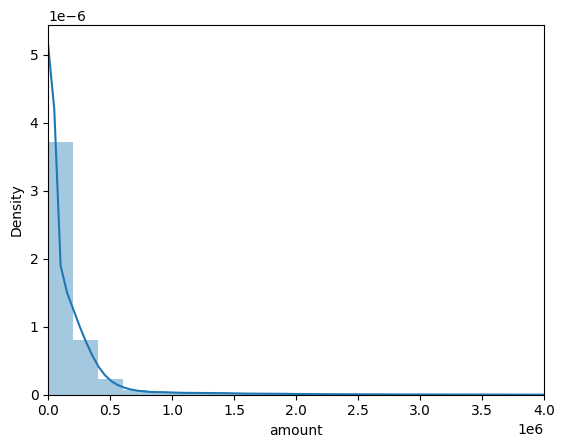

In [ ]:
df['amount'].describe()
sns.distplot(df['amount'])
plt.xlim(0, 4000000)
plt.show()

<Axes: ylabel='amount'>

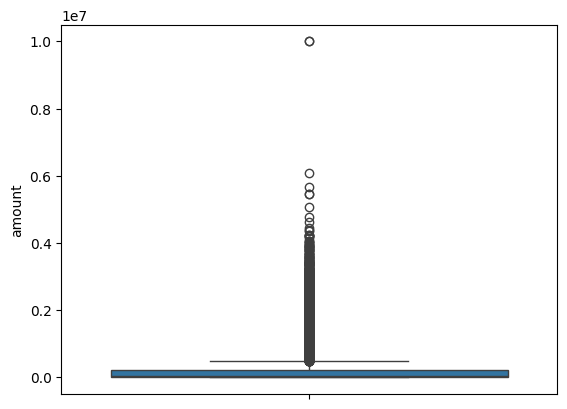

In [ ]:
sns.boxplot(df['amount'])

Here 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest' are Float objects so we chek for outliers

In [ ]:
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
df_no_outliers = remove_outliers_iqr(df, numeric_cols)

<Axes: ylabel='amount'>

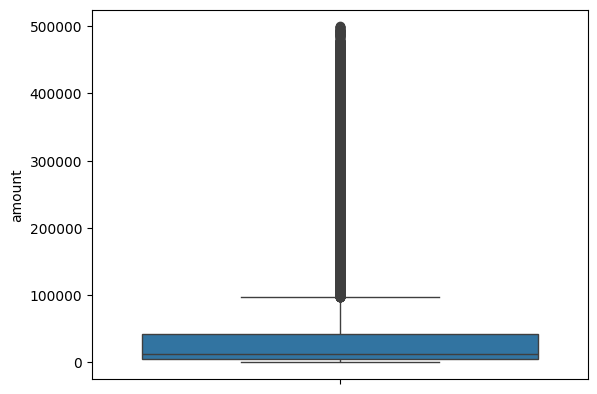

In [ ]:

sns.boxplot(df_no_outliers['amount'])

In [ ]:
print("Old data frame hape:",df.shape)
print("New data frame shape after removing outliers:",df_no_outliers.shape)

Old data frame hape: (83560, 11)
New data frame shape after removing outliers: (38666, 11)


Here after removing outliers based on interquartile range 50% data was reduced so we changed to log or Box-Cox Transformation

Finding corelation

In [ ]:

df[['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','isFraud','isFlaggedFraud']].corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.076746,-0.000424,-0.000435,0.005363,0.012122,-0.051344,NaN
amount,0.076746,1.000000,-0.005449,-0.011740,0.255485,0.378980,0.041582,NaN
oldbalanceOrg,-0.000424,-0.005449,1.000000,0.998923,0.107843,0.075448,-0.004387,NaN
newbalanceOrig,-0.000435,-0.011740,0.998923,1.000000,0.109723,0.074773,-0.011580,NaN
oldbalanceDest,0.005363,0.255485,0.107843,0.109723,1.000000,0.934949,-0.010200,NaN
newbalanceDest,0.012122,0.378980,0.075448,0.074773,0.934949,1.000000,-0.007017,NaN
isFraud,-0.051344,0.041582,-0.004387,-0.011580,-0.010200,-0.007017,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most of the datapoints are not correlated.
The new balance of the person who initiated the transaction is connected with the old balance.
A correlation exists between newbalanceDest and oldbalanceDest.

Correlation is obvious since these columns are associated when the amount is subtracted and added.

As a result, I leave all the columns in place because there isn't a clear association between unrelated factors.



In [ ]:
df[['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','isFraud','isFlaggedFraud']].skew()

,0
step,-2.502494
amount,5.545099
oldbalanceOrg,5.008049
newbalanceOrig,4.937742
oldbalanceDest,5.015623
newbalanceDest,4.257394
isFraud,27.259851
isFlaggedFraud,0.000000


It is right skewed

In [ ]:
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df_log=df[numeric_cols].copy()
df_boxcox=df[numeric_cols].copy()
for col in numeric_cols:
    df_log[col] = np.log1p(df_log[col])
    df_boxcox[col] = boxcox1p(df_boxcox[col], 0.1)

In [ ]:
df_log.skew()

,0
amount,-0.360352
oldbalanceOrg,-0.343578
newbalanceOrig,0.255023
oldbalanceDest,-0.024748
newbalanceDest,-0.020446


In [ ]:
df_boxcox.skew()

,0
amount,0.057794
oldbalanceOrg,0.226123
newbalanceOrig,0.562854
oldbalanceDest,0.190949
newbalanceDest,0.150929


From above

1.   **amount** boxocx(-0.074379) and log(-0.5535) so **boxocx**
2.   **oldbalanceOrg** boxocx(-0.348778) and log(-0.251427) so **log**
3.   **newbalanceOrg** boxocx(0.744112) and log(0.441807) so **log**
4.   **oldbalanceDest	and newbalanceDest we use boxcx**





In [ ]:
df = pd.concat([df[['step','type','nameOrig', 'nameDest','isFraud', 'isFlaggedFraud']],df_log[['oldbalanceOrg','newbalanceOrig']], df_boxcox[['amount','oldbalanceDest','newbalanceDest']]], axis=1, join='inner')
print(df.shape)
df.head()

(83560, 11)


,step,type,nameOrig,nameDest,isFraud,isFlaggedFraud,oldbalanceOrg,newbalanceOrig,amount,oldbalanceDest,newbalanceDest
0,1,PAYMENT,C1231006815,M1979787155,0.0,0.0,12.044359,11.984786,15.078545,0.000000,0.0
1,1,PAYMENT,C1666544295,M2044282225,0.0,0.0,9.964112,9.872292,11.236082,0.000000,0.0
2,1,TRANSFER,C1305486145,C553264065,1.0,0.0,5.204007,0.000000,6.827017,0.000000,0.0
3,1,CASH_OUT,C840083671,C38997010,1.0,0.0,5.204007,0.000000,6.827017,17.076888,0.0
4,1,PAYMENT,C2048537720,M1230701703,0.0,0.0,10.634773,10.305174,15.509614,0.000000,0.0


Check where high chances of fraud occured
**Customer to merchent or merchent to merchent**

In [ ]:
a1=df[(df['isFraud']==1) & (df['nameOrig'].str.startswith('C')) & (df['nameDest'].str.startswith('C'))]

In [ ]:
a2=df[(df['isFraud']==1) & (df['nameOrig'].str.startswith('C')) & (df['nameDest'].str.startswith('M'))]

In [ ]:
a3=df[(df['isFraud']==1) & (df['nameOrig'].str.startswith('M')) & (df['nameDest'].str.startswith('M'))]

In [ ]:
a1.shape,a2.shape,a3.shape

((112, 11), (0, 11), (0, 11))

fraud maximum will happen customer to customer

In [ ]:
df[df['isFraud'] == 1]['type'].value_counts()

,count
type,
CASH_OUT,57
TRANSFER,55


In [ ]:
import re
df['nameOrig'] = df['nameOrig'].apply(lambda x: re.sub('C[A-Za-z0-9]*', 'C',x))
df['nameDest'] = df['nameDest'].apply(lambda x: re.sub('C[A-Za-z0-9]*','C',x))
df['nameDest'] = df['nameDest'].apply(lambda x: re.sub('M[A-Za-z0-9]*','M',x))
df.head()

,step,type,nameOrig,nameDest,isFraud,isFlaggedFraud,oldbalanceOrg,newbalanceOrig,amount,oldbalanceDest,newbalanceDest
0,1,PAYMENT,C,M,0.0,0.0,12.044359,11.984786,15.078545,0.000000,0.0
1,1,PAYMENT,C,M,0.0,0.0,9.964112,9.872292,11.236082,0.000000,0.0
2,1,TRANSFER,C,C,1.0,0.0,5.204007,0.000000,6.827017,0.000000,0.0
3,1,CASH_OUT,C,C,1.0,0.0,5.204007,0.000000,6.827017,17.076888,0.0
4,1,PAYMENT,C,M,0.0,0.0,10.634773,10.305174,15.509614,0.000000,0.0


In [ ]:
LabelEncoder = LabelEncoder()
df['type'] = LabelEncoder.fit_transform(df['type'])
df['nameOrig'] = LabelEncoder.fit_transform(df['nameOrig'])
df['nameDest'] = LabelEncoder.fit_transform(df['nameDest'])

In [ ]:
df.head()

,step,type,nameOrig,nameDest,isFraud,isFlaggedFraud,oldbalanceOrg,newbalanceOrig,amount,oldbalanceDest,newbalanceDest
0,1,3,0,1,0.0,0.0,12.044359,11.984786,15.078545,0.000000,0.0
1,1,3,0,1,0.0,0.0,9.964112,9.872292,11.236082,0.000000,0.0
2,1,4,0,0,1.0,0.0,5.204007,0.000000,6.827017,0.000000,0.0
3,1,1,0,0,1.0,0.0,5.204007,0.000000,6.827017,17.076888,0.0
4,1,3,0,1,0.0,0.0,10.634773,10.305174,15.509614,0.000000,0.0


In [ ]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,83448
1.0,112


Here data is imbalenced so we se use smote technique so that predictions will not biased

In [ ]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
X = df.drop('isFraud', axis=1)
y = df['isFraud']
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['isFraud'] = y_resampled
print(f"Original data shape: {X.shape}")
print(f"Resampled data shape: {X_resampled.shape}")
print("Class distribution before SMOTE:")
print(y.value_counts())
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

Original data shape: (83560, 10)
Resampled data shape: (166896, 10)
Class distribution before SMOTE:
isFraud
0.0    83448
1.0      112
Name: count, dtype: int64
Class distribution after SMOTE:
isFraud
0.0    83448
1.0    83448
Name: count, dtype: int64


##*Model Selection and training*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df=df_resampled
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)
svm = SVC(kernel='linear', probability=True, random_state=42)

In [ ]:
ensemble_model = VotingClassifier(
    estimators=[
        ('dt', decision_tree),
        ('rf', random_forest),
        ('lr', logistic_regression),
        ('svm', svm)
    ],
    voting='soft'
)
ensemble_model.fit(X_train_scaled, y_train)
y_pred = ensemble_model.predict(X_test_scaled)
decision_tree.fit(X_train_scaled, y_train)
random_forest.fit(X_train_scaled, y_train)
logistic_regression.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nDecision Tree Accuracy:", accuracy_score(y_test, decision_tree.predict(X_test_scaled)))
print("Random Forest Accuracy:", accuracy_score(y_test, random_forest.predict(X_test_scaled)))
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_regression.predict(X_test_scaled)))
print("SVM Accuracy:", accuracy_score(y_test, svm.predict(X_test_scaled)))

Accuracy: 0.9967046135410426

Confusion Matrix:
 [[16534    90]
 [   20 16736]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     16624
         1.0       0.99      1.00      1.00     16756

    accuracy                           1.00     33380
   macro avg       1.00      1.00      1.00     33380
weighted avg       1.00      1.00      1.00     33380


Decision Tree Accuracy: 0.9975434391851408
Random Forest Accuracy: 0.9990413421210306
Logistic Regression Accuracy: 0.9438885560215698
SVM Accuracy: 0.9507789095266627
